# 3a)

# Import Necessary Libraries

In [138]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from numpy.linalg import inv
from numpy import dot,transpose
from sklearn.linear_model import LinearRegression
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Read Real_Estate.csv in Pandas Dataframe

In [139]:
dataset = pd.read_csv('real_estate.csv')
dataset.shape

(414, 8)

In [140]:
dataset.describe()

,no,transaction_date,house_age,distance_from_nearest_mrt,number_of_stores,lattitude,longitude,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Scatter plot to see correlation

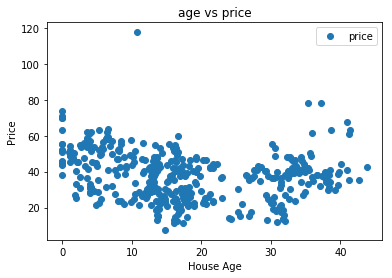

In [141]:
dataset.plot(x='house_age', y='price', style='o')  
plt.title('age vs price')  
plt.xlabel('House Age')  
plt.ylabel('Price')  
plt.show()  

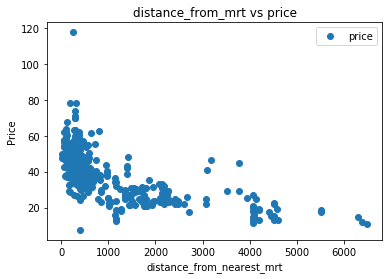

In [142]:
dataset.plot(x='distance_from_nearest_mrt', y='price', style='o')  
plt.title('distance_from_mrt vs price')  
plt.xlabel('distance_from_nearest_mrt')  
plt.ylabel('Price')  
plt.show()  

# Take the Independant Variables(Parameters) in X and Dependant   Variable(price) in Y

In [143]:
X = dataset[['house_age', 'distance_from_nearest_mrt', 'number_of_stores']]
Y = dataset['price'] 

# Split for Training and Testing

In [144]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

# Fit training set

In [145]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  

# Normal Co-efficients

# 3 b)
# House_Age has a normal coefficient of -0.25 which means for unit decrease in house age , the price decreases by 0.25. Same for distance_from_nearest_mrt parameter. For unit increase in number of stores, the house_price increases by 1.25 units. Larger co-efficient means important feature.

In [147]:
coeff_df

,Coefficient
house_age,-0.252269
distance_from_nearest_mrt,-0.005371
number_of_stores,1.250374


In [148]:
y_pred = regressor.predict(X_test) 

# Actual and Predicted values

In [149]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
356,45.3,40.788330
170,14.4,12.898011
224,46.0,40.325667
331,15.6,12.537334
306,50.2,39.976758
325,38.1,41.416413
150,48.5,42.076404
10,41.4,33.566954
21,51.6,47.876345
268,40.1,43.087052


# RMSE, MSE and MAE  errors

In [150]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred))) 

Mean Absolute Error: 6.091991741743062
Mean Squared Error: 65.61682406570173
Root Mean Squared Error: 8.100421227670925


In [151]:
Y_pred = regressor.predict(X) 

In [152]:
df = pd.DataFrame({'Actual': Y, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,37.9,47.247288
1,42.2,47.959376
2,47.3,43.150174
3,54.8,43.150174
4,43.1,46.164738
5,32.1,33.549330
6,40.3,39.972537
7,46.7,44.108453
8,18.8,6.918658
9,22.1,32.929569


# 3c) Parameter Normalization

In [153]:
xnorm=X
minage=min(X['house_age'])
mindist= min(X['distance_from_nearest_mrt'])
minn=min(X['number_of_stores'])
maxage=max(X['house_age'])
maxdist= max(X['distance_from_nearest_mrt'])
maxn=max(X['number_of_stores'])
for g in range(0,len(xnorm)):
    xnorm['house_age'][g] = (xnorm['house_age'][g] - minage)/(maxage-minage)
    xnorm['distance_from_nearest_mrt'][g] = (xnorm['distance_from_nearest_mrt'][g] - mindist)/(maxdist-mindist)
    xnorm['number_of_stores'][g]=(xnorm['number_of_stores'][g] - minn)/(maxn-minn)

d:\geek_stuff\python3.6\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
d:\geek_stuff\python3.6\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
d:\geek_stuff\python3.6\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
d:\geek

In [154]:
regressor = LinearRegression()  
regressor.fit(xnorm, Y)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
house_age,-10.318541
distance_from_nearest_mrt,-46.134061
number_of_stores,5.570229


# The co-efficients are above and the normalized features are below. Distance from nearest mrt has highest coefficient weight.

In [155]:

print((xnorm))

     house_age  distance_from_nearest_mrt  number_of_stores
0     0.730594                   0.009513                 1
1     0.445205                   0.043809                 0
2     0.303653                   0.083315                 0
3     0.303653                   0.083315                 0
4     0.114155                   0.056799                 0
5     0.162100                   0.332833                 0
6     0.787671                   0.092827                 0
7     0.463470                   0.040872                 0
8     0.723744                   0.849027                 0
9     0.408676                   0.272219                 0
10    0.794521                   0.059064                 0
11    0.143836                   0.010375                 0
12    0.296804                   0.072525                 0
13    0.465753                   0.378407                 0
14    0.301370                   0.176569                 0
15    0.815068                   0.08597

In [156]:
residual=[]
j=[]
for i in range(len(Y)):
    res= Y_pred[i]-Y[i]
    resd=abs(res)
    residual.append(resd)
    j.append(i)
    #print(residual)

# 3d) Distribution of Residuals

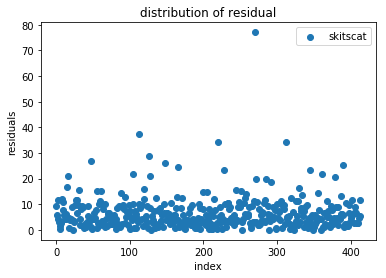

In [157]:
plt.scatter(j,residual, label='skitscat' )
plt.xlabel('index')
plt.ylabel('residuals')
plt.title('distribution of residual')
plt.legend()
plt.show()

# 3 e.i

In [158]:
X = dataset[['house_age']]
Y = dataset['price'] 

# Split train_test twice to split into train,validation and test

In [159]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.4, random_state=1)
X3_train, X3_test, Y3_train, Y3_test  = train_test_split(X2_train, Y2_train, test_size=0.2, random_state=1)

In [160]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X3_train, Y3_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
Y3_pred = regressor.predict(X3_test) 

In [162]:
df = pd.DataFrame({'Actual': Y3_test, 'Predicted': Y3_pred})  
df  

,Actual,Predicted
277,27.7,37.407375
37,25.3,38.956532
216,39.7,34.612157
215,48.1,37.744148
219,40.2,36.043443
352,25.7,37.878858
246,40.6,38.215631
130,37.5,35.992927
369,22.8,37.575762
163,55.5,39.545885


In [163]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y3_test, Y3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y3_test, Y3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y3_test, Y3_pred))) 

Mean Absolute Error: 9.227320903456905
Mean Squared Error: 130.30276671249837
Root Mean Squared Error: 11.41502372807426


In [164]:
X = dataset[['house_age','distance_from_nearest_mrt']]
Y = dataset['price'] 

In [165]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.4, random_state=1)
X3_train, X3_test, Y3_train, Y3_test  = train_test_split(X2_train, Y2_train, test_size=0.2, random_state=1)

In [166]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X3_train, Y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [167]:
Y3_pred = regressor.predict(X3_test) 
df = pd.DataFrame({'Actual': Y3_test, 'Predicted': Y3_pred})    

In [168]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y3_test, Y3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y3_test, Y3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y3_test, Y3_pred))) 

Mean Absolute Error: 6.2421199044071445
Mean Squared Error: 63.816272115435005
Root Mean Squared Error: 7.9885087541690165


In [169]:
X = dataset[['house_age', 'distance_from_nearest_mrt', 'lattitude','number_of_stores']]
Y = dataset['price'] 

In [170]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.4, random_state=1)
X3_train, X3_test, Y3_train, Y3_test  = train_test_split(X2_train, Y2_train, test_size=0.2, random_state=1)
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X3_train, Y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [171]:
Y3_pred = regressor.predict(X3_test) 
df = pd.DataFrame({'Actual': Y3_test, 'Predicted': Y3_pred})  


In [172]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y3_test, Y3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y3_test, Y3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y3_test, Y3_pred)))

Mean Absolute Error: 5.255058016503041
Mean Squared Error: 42.96450716585871
Root Mean Squared Error: 6.554731662383954


In [173]:
X = dataset[['house_age', 'distance_from_nearest_mrt', 'lattitude','longitude','number_of_stores']]
Y = dataset['price'] 

In [174]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.4, random_state=1)
X3_train, X3_test, Y3_train, Y3_test  = train_test_split(X2_train, Y2_train, test_size=0.2, random_state=1)
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X3_train, Y3_train)
Y3_pred = regressor.predict(X3_test) 
df = pd.DataFrame({'Actual': Y3_test, 'Predicted': Y3_pred})  


In [175]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y3_test, Y3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y3_test, Y3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y3_test, Y3_pred)))

Mean Absolute Error: 5.252980053488078
Mean Squared Error: 42.96013417478924
Root Mean Squared Error: 6.554398078755153


# The optimal set of features is 'house_age', 'distance_from_nearest_mrt', 'lattitude','longitude','number_of_stores' ie 5 features